In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import seaborn as sns

**LOADING DATA FROM CSV**


In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,OrderNumber,ProductName,Color,Category,Subcategory,ListPrice,Orderdate,Duedate,Shipdate,PromotionName,SalesRegion,OrderQuantity,UnitPrice,SalesAmount,DiscountAmount,TaxAmount,Freight
0,SO43843,"Mountain-100 Silver, 48",Silver,Bikes,Mountain Bikes,3399.9900,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,2,2039.9940,4079.9880,0.0,326.3990,101.9997
1,SO43843,"Mountain-100 Black, 48",Black,Bikes,Mountain Bikes,3374.9900,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,2,2024.9940,4049.9880,0.0,323.9990,101.2497
2,SO43843,"HL Mountain Frame - Silver, 46",Silver,Components,Mountain Frames,1204.3248,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,2,722.5949,1445.1898,0.0,115.6152,36.1297
3,SO43843,"Mountain-100 Black, 44",Black,Bikes,Mountain Bikes,NaN,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,5,2024.9940,10124.9700,0.0,809.9976,253.1243
4,SO43843,"HL Mountain Frame - Silver, 38",Silver,Components,Mountain Frames,1204.3248,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,2,722.5949,1445.1898,0.0,115.6152,36.1297


In [4]:
data.head(10)

,OrderNumber,ProductName,Color,Category,Subcategory,ListPrice,Orderdate,Duedate,Shipdate,PromotionName,SalesRegion,OrderQuantity,UnitPrice,SalesAmount,DiscountAmount,TaxAmount,Freight
0,SO43843,"Mountain-100 Silver, 48",Silver,Bikes,Mountain Bikes,3399.9900,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,2,2039.9940,4079.9880,0.0,326.3990,101.9997
1,SO43843,"Mountain-100 Black, 48",Black,Bikes,Mountain Bikes,3374.9900,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,2,2024.9940,4049.9880,0.0,323.9990,101.2497
2,SO43843,"HL Mountain Frame - Silver, 46",Silver,Components,Mountain Frames,1204.3248,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,2,722.5949,1445.1898,0.0,115.6152,36.1297
3,SO43843,"Mountain-100 Black, 44",Black,Bikes,Mountain Bikes,NaN,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,5,2024.9940,10124.9700,0.0,809.9976,253.1243
4,SO43843,"HL Mountain Frame - Silver, 38",Silver,Components,Mountain Frames,1204.3248,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,2,722.5949,1445.1898,0.0,115.6152,36.1297
5,SO43843,"HL Mountain Frame - Silver, 48",Silver,Components,Mountain Frames,1364.5000,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,1,818.7000,818.7000,0.0,65.4960,20.4675
6,SO43843,"HL Mountain Frame - Black, 48",Black,Components,Mountain Frames,1349.6000,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,Nan,809.7600,809.7600,0.0,64.7808,20.2440
7,SO43843,"Mountain-100 Silver, 38",Silver,Bikes,Mountain Bikes,3399.9900,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,2,2039.9940,4079.9880,0.0,326.3990,101.9997
8,SO43843,"Mountain Bike Socks, M",White,Clothing,Socks,9.5000,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,2,5.7000,11.4000,0.0,0.9120,0.2850
9,SO43843,"Mountain-100 Black, 42",Black,Bikes,Mountain Bikes,3374.9900,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,3,2024.9940,6074.9820,0.0,485.9986,151.8746


In [5]:
##Checking the number of rows and columns that your dataset has:

data.shape

(32040, 17)

In [6]:
##Check datatype of each attribute

data.dtypes

OrderNumber        object
ProductName        object
Color              object
Category           object
Subcategory        object
ListPrice         float64
Orderdate          object
Duedate            object
Shipdate           object
PromotionName      object
SalesRegion        object
OrderQuantity      object
UnitPrice         float64
SalesAmount       float64
DiscountAmount    float64
TaxAmount         float64
Freight           float64
dtype: object

**Setting the data types correctly...**

In [9]:
data[["Orderdate", "Duedate", "Shipdate"]] = data[["Orderdate", "Duedate", "Shipdate"]].apply(pd.to_datetime)
data["OrderQuantity"] = data["OrderQuantity"].astype(float).astype('Int64')
data.dtypes

OrderNumber               object
ProductName               object
Color                     object
Category                  object
Subcategory               object
ListPrice                float64
Orderdate         datetime64[ns]
Duedate           datetime64[ns]
Shipdate          datetime64[ns]
PromotionName             object
SalesRegion               object
OrderQuantity              Int64
UnitPrice                float64
SalesAmount              float64
DiscountAmount           float64
TaxAmount                float64
Freight                  float64
dtype: object

**distinct values in each column**

In [11]:
data[data.duplicated()] 

,OrderNumber,ProductName,Color,Category,Subcategory,ListPrice,Orderdate,Duedate,Shipdate,PromotionName,SalesRegion,OrderQuantity,UnitPrice,SalesAmount,DiscountAmount,TaxAmount,Freight


**Using describe method to check basic statiscal measures of our data like count, mean, min, max, std quantiles etc**

In [12]:
data.describe()

,ListPrice,Orderdate,Duedate,Shipdate,OrderQuantity,UnitPrice,SalesAmount,DiscountAmount,TaxAmount,Freight
count,32032.000000,32040,32040,32040,32024.0,32040.000000,32040.000000,32040.00000,32040.000000,32040.000000
mean,714.663419,2012-08-26 13:08:48.539325696,2012-09-07 13:08:48.539325696,2012-09-02 13:08:48.539325952,3.626468,424.122103,1299.023131,8.15285,103.921849,32.475594
min,2.290000,2011-01-29 00:00:00,2011-02-10 00:00:00,2011-02-05 00:00:00,1.0,1.328200,1.374000,0.00000,0.109900,0.034400
25%,54.990000,2012-02-29 00:00:00,2012-03-12 00:00:00,2012-03-07 00:00:00,2.0,32.994000,125.964000,0.00000,10.077100,3.149100
50%,337.220000,2013-01-28 00:00:00,2013-02-09 00:00:00,2013-02-04 00:00:00,3.0,202.332000,445.410000,0.00000,35.632800,11.135300
75%,1079.990000,2013-03-30 00:00:00,2013-04-11 00:00:00,2013-04-06 00:00:00,5.0,647.994000,1457.820000,0.00000,116.625600,36.445500
max,3578.270000,2013-06-30 00:00:00,2013-07-12 00:00:00,2013-07-07 00:00:00,40.0,2146.962000,27893.619000,4005.23760,2231.489500,697.340500
std,851.623778,NaN,NaN,NaN,3.11648,506.799303,2153.316625,78.40708,172.265331,53.832916


**Data Cleaning**

In [13]:
##There are some error in the dataset that we need to fix:

##How many null values are there in each columns?

data.isnull().sum()

OrderNumber          0
ProductName          0
Color             2967
Category             0
Subcategory          0
ListPrice            8
Orderdate            0
Duedate              0
Shipdate             0
PromotionName        0
SalesRegion         15
OrderQuantity       16
UnitPrice            0
SalesAmount          0
DiscountAmount       0
TaxAmount            0
Freight              0
dtype: int64

In [ ]:
# Some of the products have Quantity as Null, we need to set their quantity to 1.

In [18]:
data['OrderQuantity'].fillna(value=1, inplace=True)

In [21]:
data['OrderQuantity'] = data['OrderQuantity'].fillna(1)


In [ ]:
##Some of the products have Null List Price, setting their price as the mean of that product price in other orders.

In [23]:
# Fill missing ListPrice values by the mean ListPrice of each ProductName group
data['ListPrice'] = data.groupby('ProductName')['ListPrice'].transform(lambda x: x.fillna(x.mean()))

# If there are still any missing ListPrice values, fill them with the overall mean ListPrice
data['ListPrice'] = data['ListPrice'].fillna(data['ListPrice'].mean())

##Use .transform() because it returns a series of the same length as the original data, ensuring that the column remains aligned with the original index.
##apply() can sometimes return an aggregated result, which may cause misalignment.

In [24]:
#Some orders do not have a sales region assigned, we need to remove such order lines

data = data[data['SalesRegion'].notna()]

In [29]:
##Some orders have Due date less than Order date, due date should be set as Order data in such cases

##The goal is to fix the issue by setting Duedate to be equal to Orderdate, ensuring that no order has a due date earlier than its order date.

In [30]:
##Data validation
data.loc[data['Orderdate'] > data['Duedate'], 'Duedate'] = data['Orderdate']

**there are outliers in the data? Let's eliminate extreme values (if any) in Order Sales Amount. 
Note: Extreme values can be seen as those outside +/- 3 standard deviation. 
this is wise to identify outliers this way?**

In [31]:
# outliers = data[data['SalesAmount'] > (data['SalesAmount'].mean() + (3 * data['SalesAmount'].std()))] 
# outliers2 = data[data['SalesAmount'] < (data['SalesAmount'].mean() - (3 * data['SalesAmount'].std()))]
# outliers.append(outliers2)
# outliers.head()

#removing outliers from data:
print(data['SalesAmount'].mean(), data['SalesAmount'].std(), data['SalesAmount'].mean() - 3 * data['SalesAmount'].std(), data['SalesAmount'].mean() + 3 * data['SalesAmount'].std())
data = data[data['SalesAmount'] < (data['SalesAmount'].mean() + (3 * data['SalesAmount'].std()))] 
data = data[data['SalesAmount'] > (data['SalesAmount'].mean() - (3 * data['SalesAmount'].std()))]

1298.8642341233412 2153.1819107753727 -5160.681498202777 7758.409966449459


**Data Exploration**

Checking how many products have been sold under each category

In [32]:
data.groupby(['Category']).agg({'OrderQuantity':np.sum}).reset_index()

C:\Users\basan\AppData\Local\Temp\ipykernel_29908\4194217099.py:1: FutureWarning: The provided callable <function sum at 0x000002847FAD1440> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data.groupby(['Category']).agg({'OrderQuantity':np.sum}).reset_index()


,Category,OrderQuantity
0,Accessories,14355
1,Bikes,31987
2,Clothing,35549
3,Components,28148


**Drawing boxplot of cateogry vs product list price to compare prices of products across categories.**

<Axes: xlabel='Category', ylabel='ListPrice'>

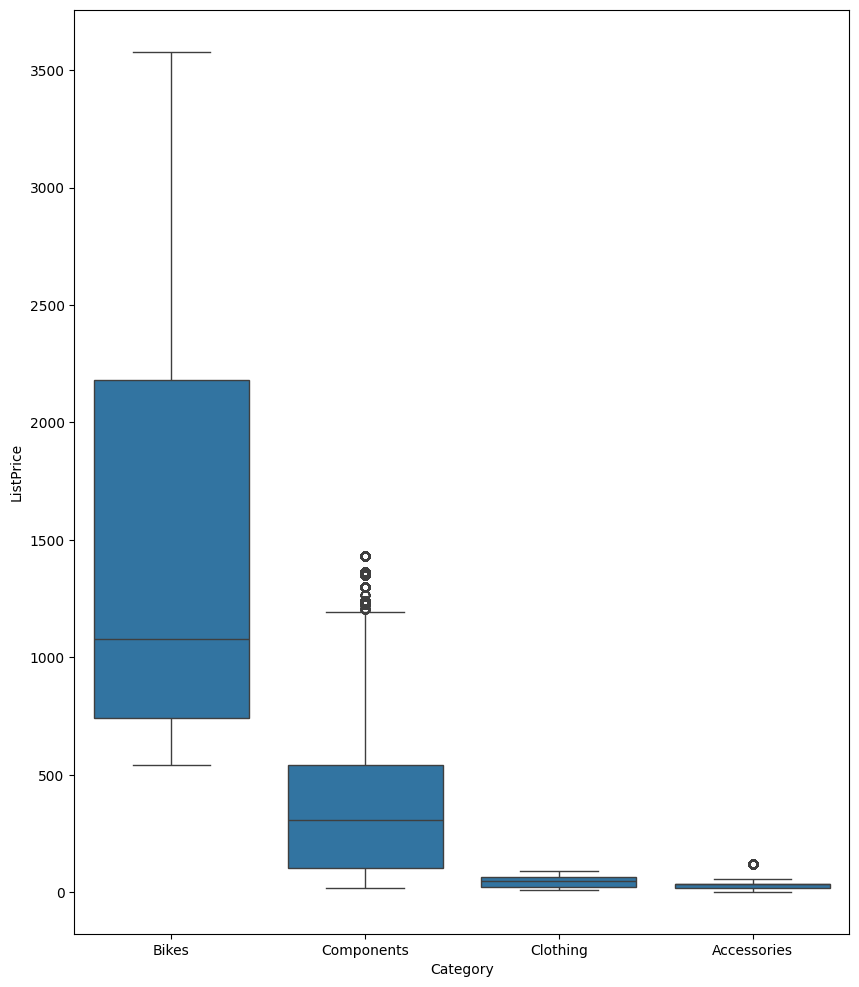

In [33]:
plt.figure(figsize =(10, 12)) 
sns.boxplot(y= data['ListPrice'], x = data['Category'])

**Analysis**:The box plot shows that List Price of Bikes is very high compared to the rest of the categories. This makes sense because the price of bikes would be a lot more than accessories and clothes. We can also see that the bike List price is positively skewed. This means that most of the bike prices are more than the median price.

Plot bar chart and pie chart to see total sales of products in each category.

<Axes: xlabel='Category', ylabel='ListPrice'>

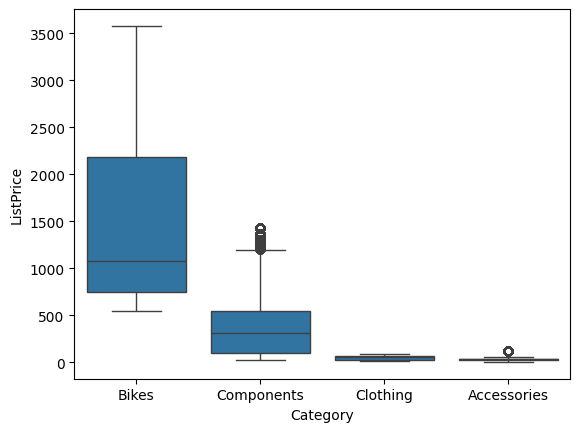

In [34]:

sns.boxplot(y= data['ListPrice'], x = data['Category'])

C:\Users\basan\AppData\Local\Temp\ipykernel_29908\3457141967.py:1: FutureWarning: The provided callable <function sum at 0x000002847FAD1440> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df = data.groupby(['Category']).agg({'OrderQuantity':np.sum}).reset_index()


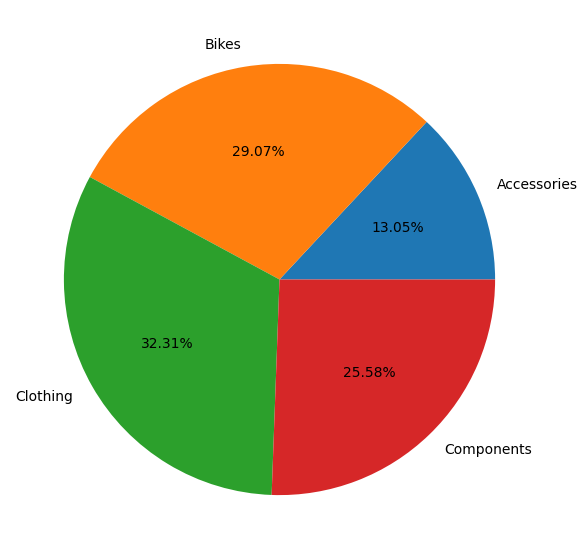

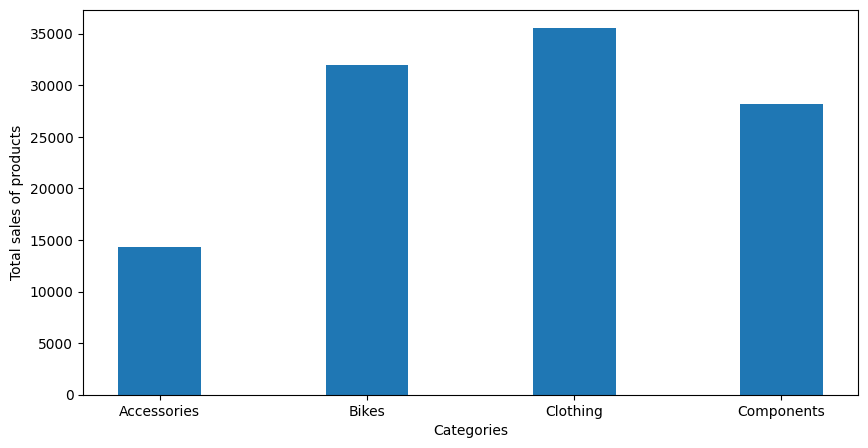

In [35]:
df = data.groupby(['Category']).agg({'OrderQuantity':np.sum}).reset_index()
fig1 = plt.figure(figsize =(10, 7)) 
plt.pie(df.OrderQuantity, labels = df.Category,autopct='%1.2f%%')
# show plot 
plt.show() 

fig2 = plt.figure(figsize = (10, 5)) 
plt.bar(df.Category, df.OrderQuantity, width = 0.4)
plt.xlabel("Categories") 
plt.ylabel("Total sales of products")  
# show plot 
plt.show()

**Analysis**:As can be observed from the charts, the highest number of products sold come from Clothing category followed by Bikes then components and then Accessories with the least number of products sold.

**Plotting histogram of all numeric attrubites to see their distribution**

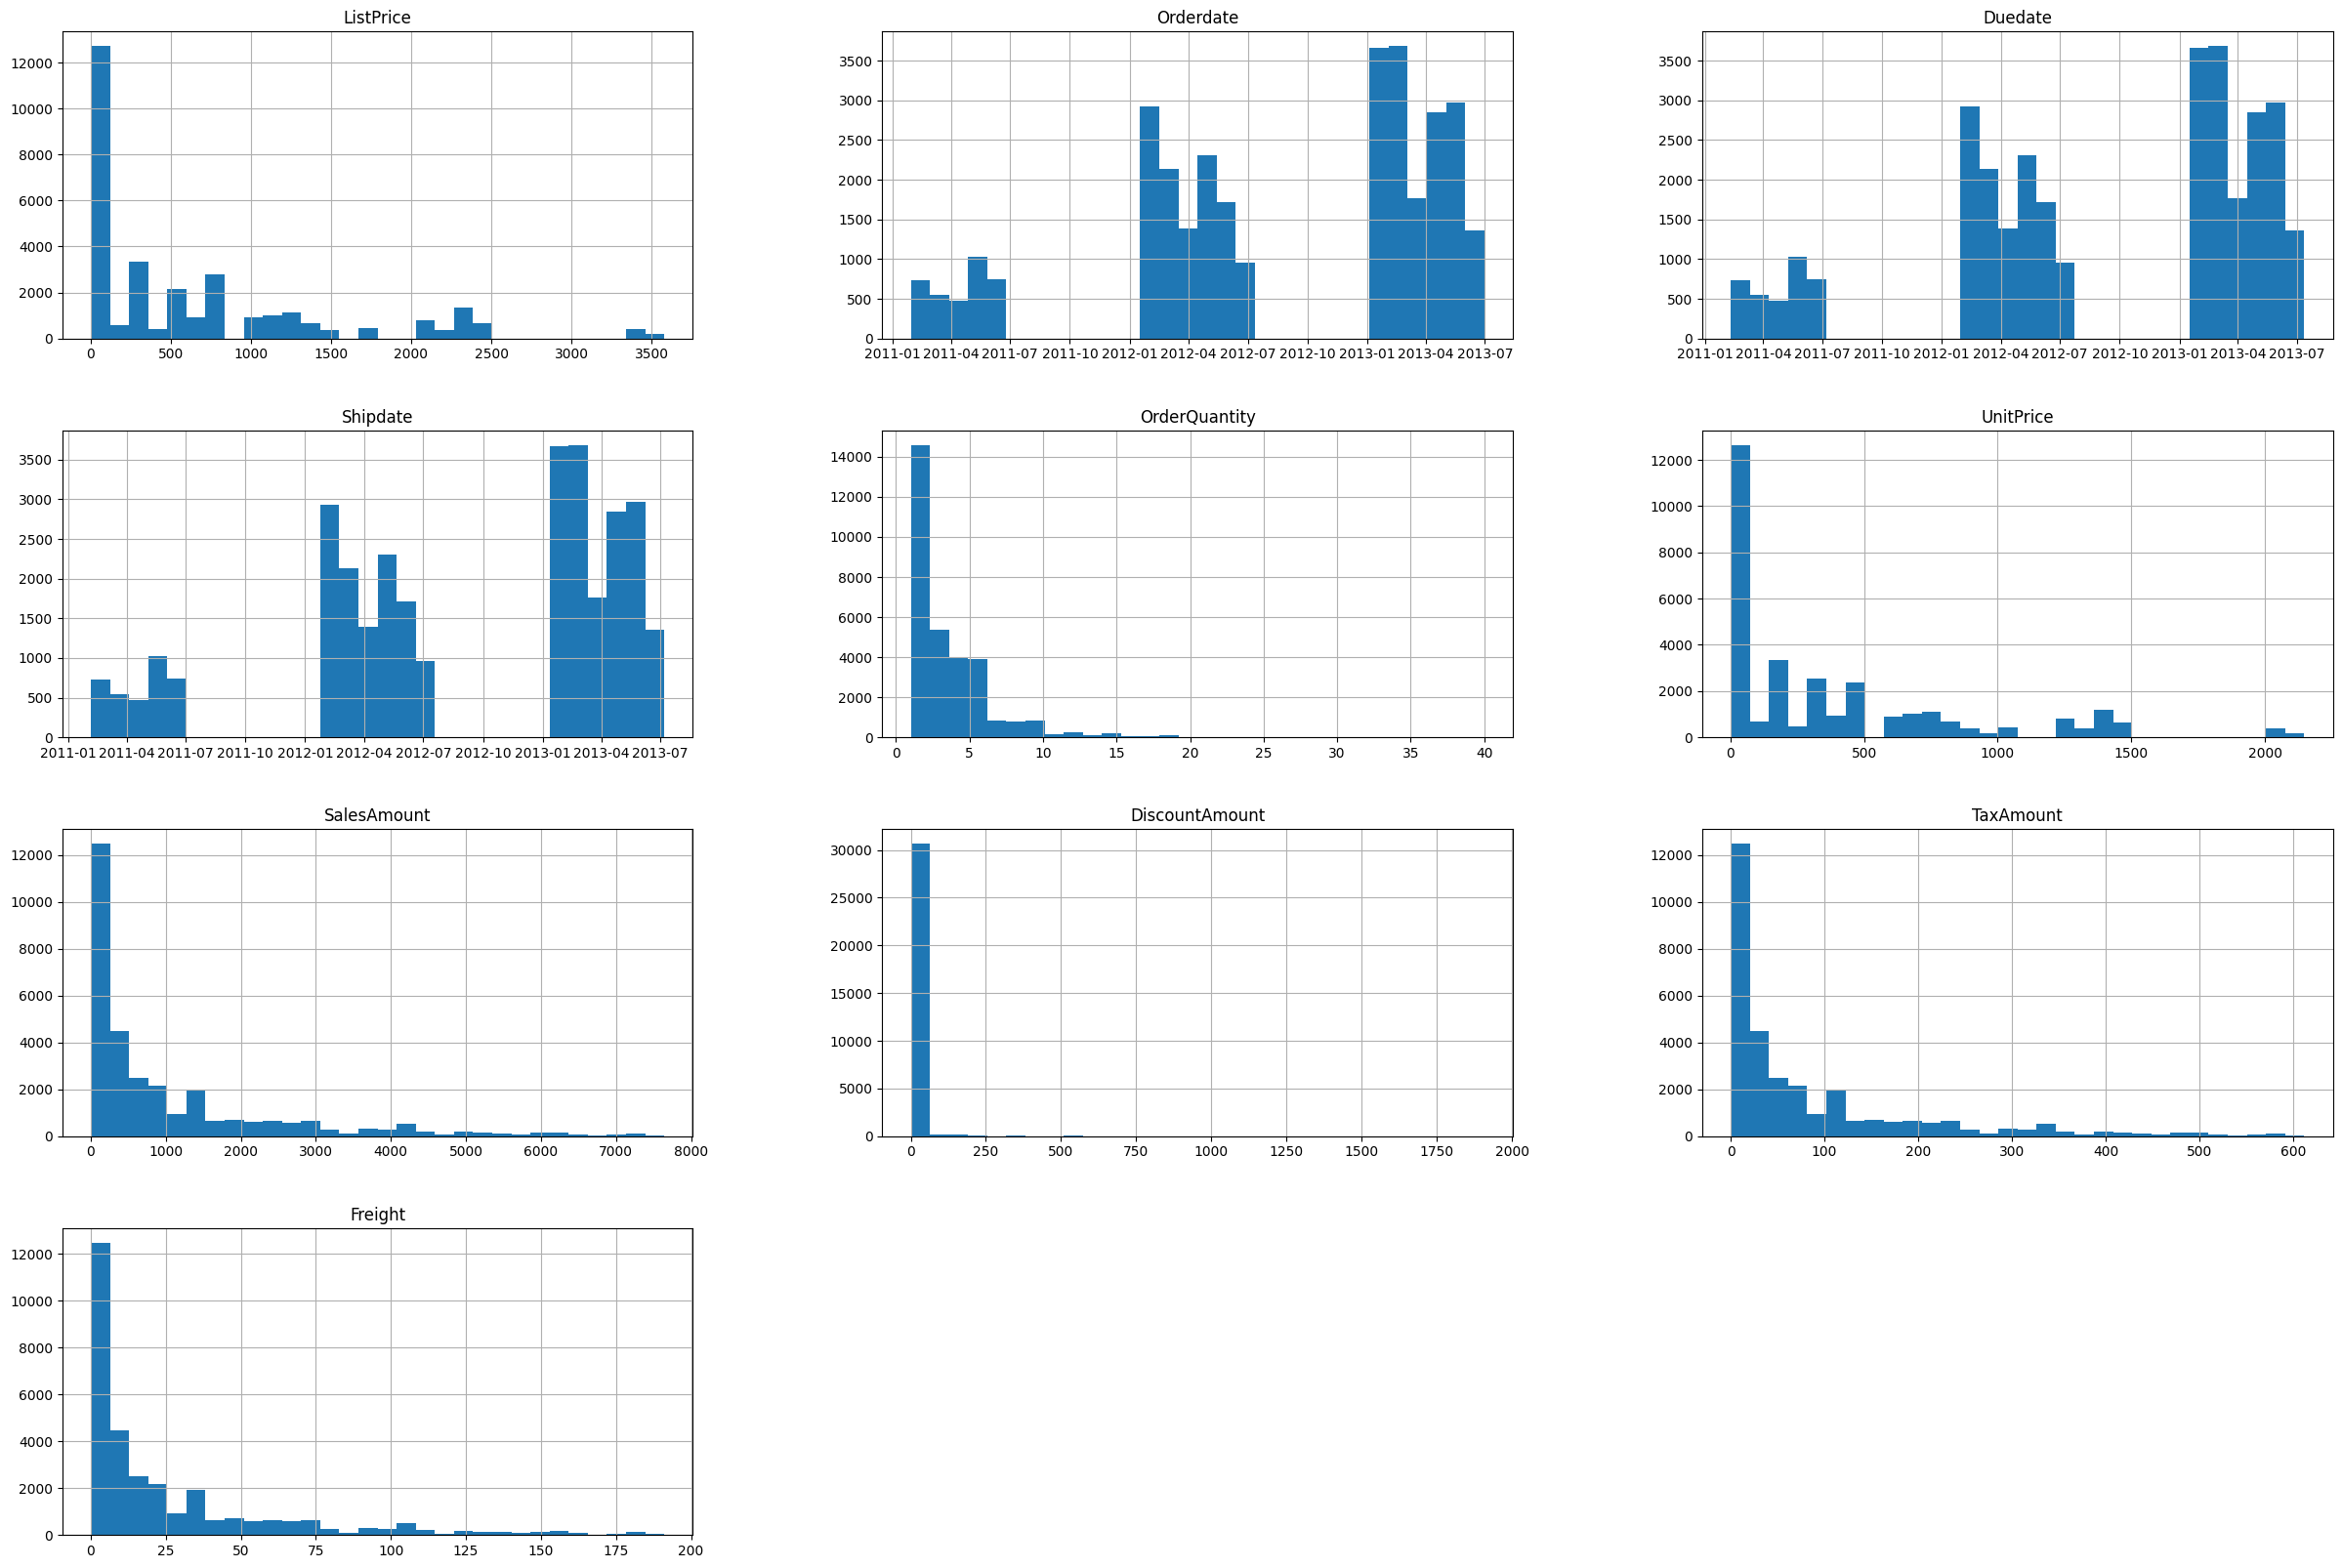

In [38]:
# Plot the histograms of each 
data.hist(bins=30, figsize=(30,20))
plt.show()

In [ ]:
##sns.distplot(data['column_name'], bins=10, color='g') ---------for histogram

**Analysis**:From the above histograms we can make some conclusions:

1.Most of the Products have been ordered without any discount i.e. at full price.

2.Most of the orders have a very low freight amount charged.

3.The list Price and Unit Price are following the same pattern. 

4.The prices are also very similar in both histograms.

5.Most of the orders have 1-2 products of each kind. 

6.Many orders also have upto 7 same products but more than that is quite rare.

7.Sales amount, tax amount and Freight are following the same trends and most of the orders have comparatively low sales amount (less than $1000) and hence low tax amount and freight applied on them.

C:\Users\basan\AppData\Local\Temp\ipykernel_29908\3886049413.py:2: FutureWarning: The provided callable <function sum at 0x000002847FAD1440> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df = data.groupby(['PromotionName']).agg({'OrderQuantity':np.sum}).reset_index().sort_values('OrderQuantity')


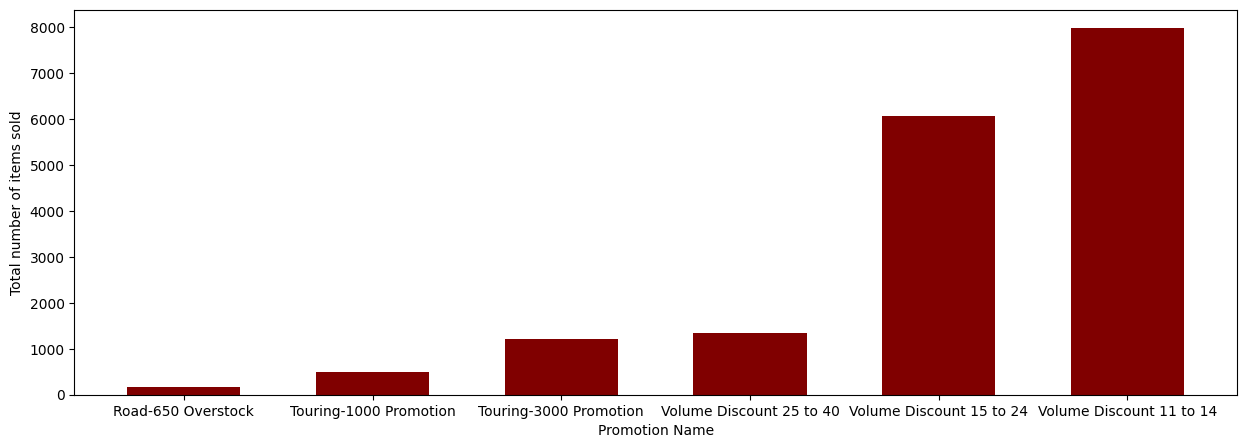

In [39]:
#Promotion
df = data.groupby(['PromotionName']).agg({'OrderQuantity':np.sum}).reset_index().sort_values('OrderQuantity')
#Filter data
#print(promotionData)
promotionData = df[df.PromotionName != 'No Discount']
#Plot bar chart
fig = plt.figure(figsize = (15, 5)) 
plt.bar(promotionData.PromotionName, promotionData.OrderQuantity, color ='maroon', width = 0.6)
plt.xlabel("Promotion Name") 
plt.ylabel("Total number of items sold")  
# show plot 
plt.show()

**Analysis**:Highest number of products sold are under the discount, 'Volume Discount 11 to 14' followed closely by 'Volume Discount 15 to 24' after which there is a stark decrease in products sold under discounts with least number of products sold under the discount 'Road-650 Overstock'.

Plot number of orders placed on each day of week. Is there any interesting trend?

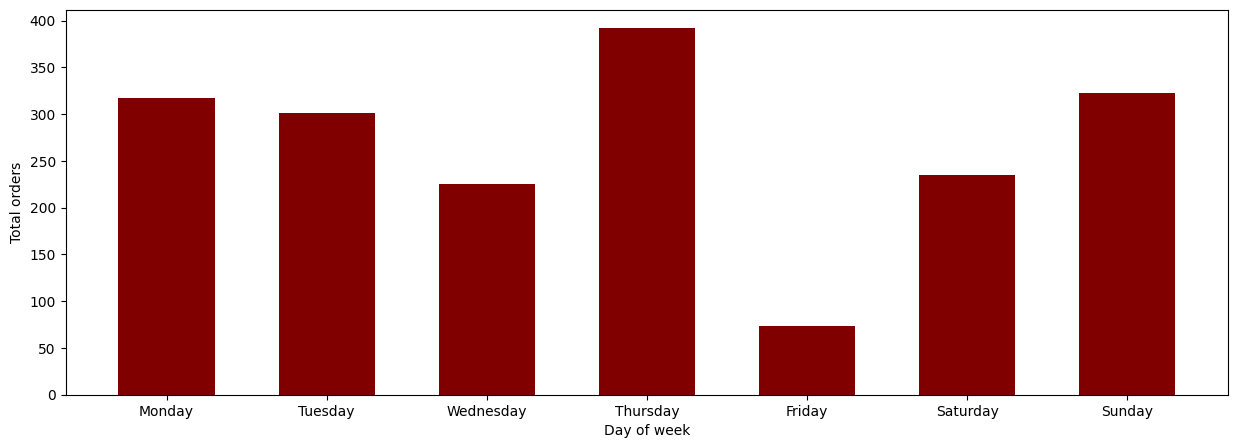

In [40]:
df = data.groupby(['Orderdate', 'OrderNumber']).size()
new_df = df.to_frame(name = 'size').reset_index()
new_df['NumberofOrders']=1
new_df['day_of_week'] = new_df['Orderdate'].dt.day_name()

dataSales = new_df.groupby('day_of_week')['NumberofOrders'].agg('sum').reset_index()
dataSales = dataSales.loc[[1,5,6,4,0,2,3], :]

# #plotting bar chart
fig = plt.figure(figsize = (15, 5)) 
plt.bar(dataSales.day_of_week, dataSales.NumberofOrders, color ='maroon', width = 0.6)
plt.xlabel("Day of week") 
plt.ylabel("Total orders") 
plt.show()

**Analysis**:There are more orders placed on weekdays than weekends with the highest number of orders being placed on Thursdays. The trend drops to the least number of orders plcaed on Friday after which it picks up on Saturday and Sunday.

**Is there any impact of promotion on overall product sales?**

Index(['PromotionName', 'OrderQuantity'], dtype='object')


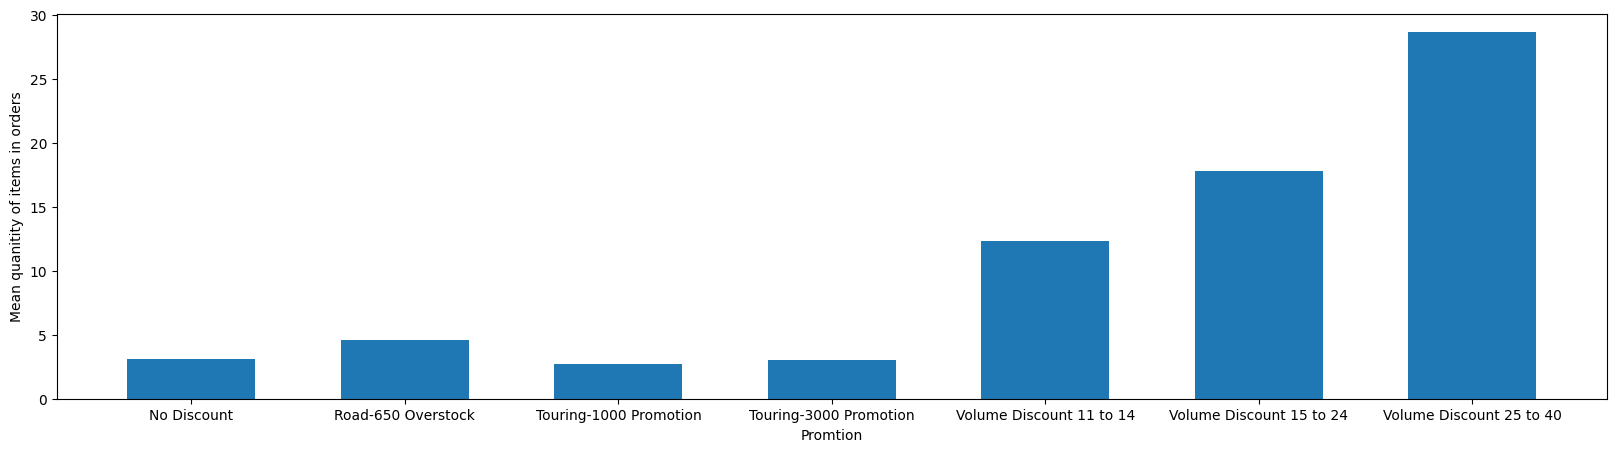

,PromotionName,OrderQuantity
0,No Discount,3.136119
1,Road-650 Overstock,4.567568
2,Touring-1000 Promotion,2.734463
3,Touring-3000 Promotion,3.019753
4,Volume Discount 11 to 14,12.302003
5,Volume Discount 15 to 24,17.818182
6,Volume Discount 25 to 40,28.638298


In [41]:
df = data.groupby(['OrderNumber','PromotionName']).agg({'OrderQuantity': ['sum']})
df_promo = data.groupby(['PromotionName'], as_index=False).agg({'OrderQuantity': ['mean']})
df_promo.columns = df_promo.columns.droplevel(1)
df_promo.head(10)
print(df_promo.columns)

#plot bar chart
fig = plt.figure(figsize = (20, 5))
plt.bar(df_promo.PromotionName, df_promo.OrderQuantity, align='center', width=0.6)
plt.xlabel("Promtion") 
plt.ylabel("Mean quanitity of items in orders") 
plt.show()
df_promo.head(10)

**Analysis**: As we can see, the number of average quanitites in an order increases overall when there is a promotion as compared to without any discount. We can also see discount 25 to 40 having most order quantities followed by vol 15 to 20 and then vol 11 to 14. Hence, promotions have a positive impact on product sales.

In [ ]:
##Insert a new column 'ProcessingDays' which is calculated as ShippedDate - OrderDate

In [42]:
#data['ProcessingDays'] = (data['Shipdate']-data['Orderdate'])
data['ProcessingDays'] = (data['Shipdate'] - data['Orderdate']).dt.days
data['ProcessingDays'] = data['ProcessingDays'].astype('timedelta64[D]').astype(int)
data.dtypes


OrderNumber               object
ProductName               object
Color                     object
Category                  object
Subcategory               object
ListPrice                float64
Orderdate         datetime64[ns]
Duedate           datetime64[ns]
Shipdate          datetime64[ns]
PromotionName             object
SalesRegion               object
OrderQuantity              Int64
UnitPrice                float64
SalesAmount              float64
DiscountAmount           float64
TaxAmount                float64
Freight                  float64
ProcessingDays             int64
dtype: object

In [ ]:
meanProcessingdays = data['ProcessingDays'].mean()
print("The mean processing days are", meanProcessingdays)
sns.boxplot(y=data['ProcessingDays'])

**Analysis**:The average processing time is 7 days and there is no deviation from it.

Perform some analysis on the number of products in an order. What is their average, min, max etc. Use appropriate tools to present a summary of this information.

In [43]:
df.head(20)
df = data.groupby(['OrderNumber'], sort=False).size().reset_index(name='Count')
df['Count'].describe()

count    1866.000000
mean       16.737942
std        16.411185
min         1.000000
25%         3.000000
50%        10.000000
75%        27.000000
max        68.000000
Name: Count, dtype: float64

<Axes: ylabel='Count'>

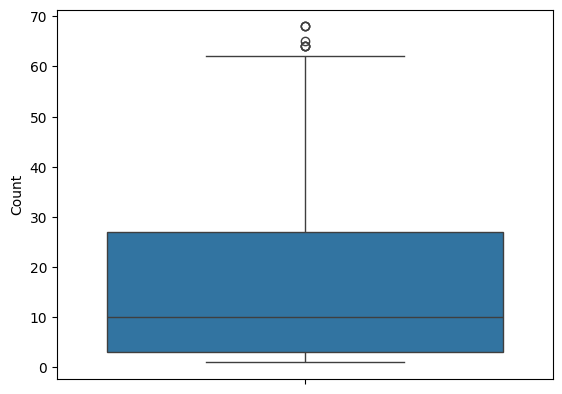

In [45]:
sns.boxplot(y= df['Count'])

**Analysis**:The above box plot shows that the median of the number of products in an order is 10 and the mean is 16.7 therefore we see the box plot positively skewed. The maximum number of products in an order are 68 and this is considered an outlier.

Performing some other meaningful analysis on the data and present our findings.

**Normalization**

In [ ]:
#Create a new column 'NormalizedPrice' that contains normalized ListPrice of products. Z-Score normalization will be performed

In [46]:
#z-score normalization
data['NormalizedPrice'] = data.iloc[:,5:6].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
data.head(20)

,OrderNumber,ProductName,Color,Category,Subcategory,ListPrice,Orderdate,Duedate,Shipdate,PromotionName,SalesRegion,OrderQuantity,UnitPrice,SalesAmount,DiscountAmount,TaxAmount,Freight,ProcessingDays,NormalizedPrice
0,SO43843,"Mountain-100 Silver, 48",Silver,Bikes,Mountain Bikes,3399.9900,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,2,2039.9940,4079.9880,0.0,326.3990,101.9997,604800,3.409273
1,SO43843,"Mountain-100 Black, 48",Black,Bikes,Mountain Bikes,3374.9900,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,2,2024.9940,4049.9880,0.0,323.9990,101.2497,604800,3.378086
2,SO43843,"HL Mountain Frame - Silver, 46",Silver,Components,Mountain Frames,1204.3248,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,2,722.5949,1445.1898,0.0,115.6152,36.1297,604800,0.670221
4,SO43843,"HL Mountain Frame - Silver, 38",Silver,Components,Mountain Frames,1204.3248,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,2,722.5949,1445.1898,0.0,115.6152,36.1297,604800,0.670221
5,SO43843,"HL Mountain Frame - Silver, 48",Silver,Components,Mountain Frames,1364.5000,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,1,818.7000,818.7000,0.0,65.4960,20.4675,604800,0.870036
6,SO43843,"HL Mountain Frame - Black, 48",Black,Components,Mountain Frames,1349.6000,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,1,809.7600,809.7600,0.0,64.7808,20.2440,604800,0.851449
7,SO43843,"Mountain-100 Silver, 38",Silver,Bikes,Mountain Bikes,3399.9900,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,2,2039.9940,4079.9880,0.0,326.3990,101.9997,604800,3.409273
8,SO43843,"Mountain Bike Socks, M",White,Clothing,Socks,9.5000,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,2,5.7000,11.4000,0.0,0.9120,0.2850,604800,-0.820302
9,SO43843,"Mountain-100 Black, 42",Black,Bikes,Mountain Bikes,3374.9900,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,3,2024.9940,6074.9820,0.0,485.9986,151.8746,604800,3.378086
14,SO43845,"LL Road Frame - Red, 44",Red,Components,Road Frames,306.5636,2011-01-29,2011-02-10,2011-02-05,No Discount,Southeast,1,183.9382,183.9382,0.0,14.7151,4.5985,604800,-0.449720


(array([13046.,  3629.,   462.,  3451.,  2353.,   906.,  1888.,   910.,
          552.,   443.,     0.,   798.,   959.,  1251.,     0.,     0.,
            0.,     0.,   199.,   386.]),
 array([1.32820000e+00, 1.08609890e+02, 2.15891580e+02, 3.23173270e+02,
        4.30454960e+02, 5.37736650e+02, 6.45018340e+02, 7.52300030e+02,
        8.59581720e+02, 9.66863410e+02, 1.07414510e+03, 1.18142679e+03,
        1.28870848e+03, 1.39599017e+03, 1.50327186e+03, 1.61055355e+03,
        1.71783524e+03, 1.82511693e+03, 1.93239862e+03, 2.03968031e+03,
        2.14696200e+03]),
 <BarContainer object of 20 artists>)

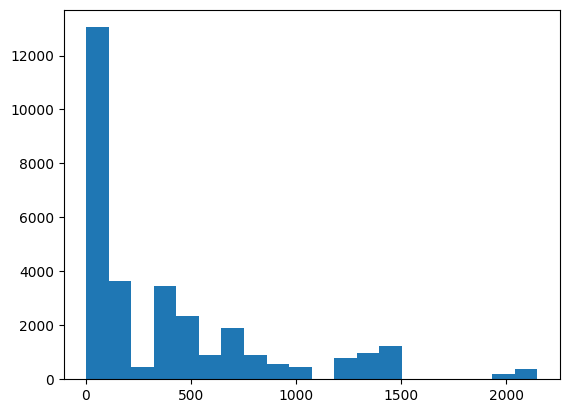

In [47]:
plt.hist(data.UnitPrice, bins=20)

**Analysis**:The histogram is not following a normal distribution, rather it is right-skewed.

Let's update UnitPrice by its log and then plot histogram. Is there any change?

(array([  90.,   12.,  239., 1302.,    0.,  272.,  938., 2535., 3457.,
        2223., 1825.,  153., 1114., 2821., 1780., 4180., 1840., 2859.,
        3008.,  585.]),
 array([0.28382464, 0.65322386, 1.02262309, 1.39202231, 1.76142153,
        2.13082076, 2.50021998, 2.8696192 , 3.23901842, 3.60841765,
        3.97781687, 4.34721609, 4.71661532, 5.08601454, 5.45541376,
        5.82481298, 6.19421221, 6.56361143, 6.93301065, 7.30240988,
        7.6718091 ]),
 <BarContainer object of 20 artists>)

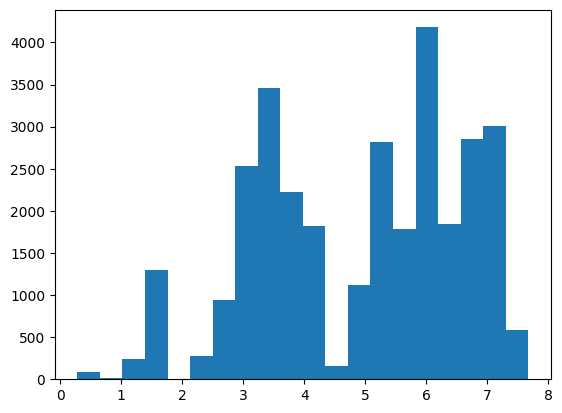

In [48]:
plt.hist(np.log(data.UnitPrice), bins=20)

**Analysis**:Now the histogram is a bit left-skewed now but the skew is much more gentle than before.

Let's investigate if prices within categories are normally distributed and present our analysis.

0        7.620702
1        7.613322
2        6.582849
4        6.582849
5        6.707718
           ...   
32035    7.265739
32036    6.591550
32037    6.400832
32038    6.591550
32039    5.298577
Name: UnitPrice, Length: 31233, dtype: float64

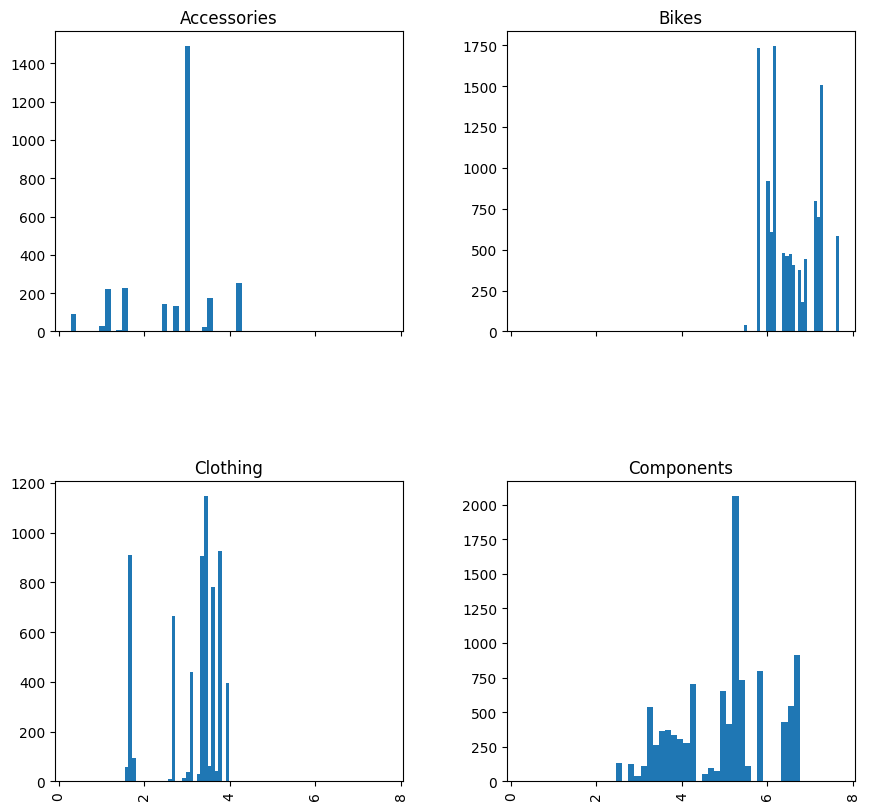

In [49]:
plot_test=np.log(data.UnitPrice).hist(by=data['Category'],sharex=True,figsize=(10,10), bins=30)  
np.log(data.UnitPrice)

<Axes: xlabel='Category', ylabel='UnitPrice'>

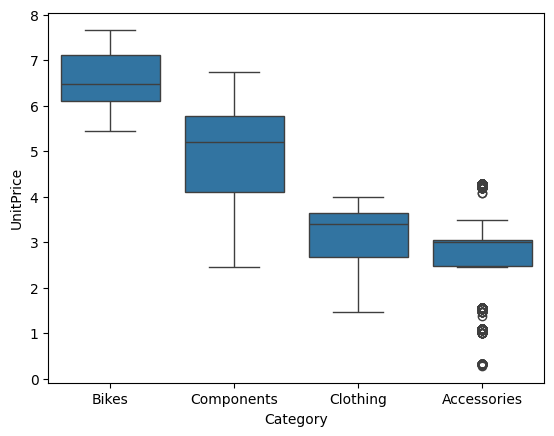

In [50]:
sns.boxplot(y= np.log(data.UnitPrice), x = data['Category'])

**Analysis**:The bikes and components data are to some extent normally distributed as can be seen from the box plots but components is slightly left-skewed. The Accessories data is heavily skewed and also has many outliers, whereas clothing is negatively skewed.

Product prices are on a continuous scale. You want to descritize them. User KBinDiscretizer to find boundaries using:

equal bin discretization
equal frequency discretization
kmeans discretization

Which one  is better?

**Correlation:**
Studying correlation between attributes via:

correlation coefficients

scatter plot matrix

plotting heatmap

You can focus on numeric attributes for this.

In [72]:
#correlation coefficients
# Drop irrelevant columns

df = data.drop(labels=['ProcessingDays', 'NormalizedPrice'], axis=1)

# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Display the correlation matrix
print(corr_matrix)

##This matrix shows how strongly each numerical feature is linearly related to every other feature.

                ListPrice  OrderQuantity  UnitPrice  SalesAmount  \
ListPrice        1.000000      -0.229128   0.996780     0.769445   
OrderQuantity   -0.229128       1.000000  -0.230318     0.096628   
UnitPrice        0.996780      -0.230318   1.000000     0.772700   
SalesAmount      0.769445       0.096628   0.772700     1.000000   
DiscountAmount   0.111123       0.111333   0.048769     0.110071   
TaxAmount        0.769445       0.096628   0.772700     1.000000   
Freight          0.769445       0.096628   0.772700     1.000000   

                DiscountAmount  TaxAmount   Freight  
ListPrice             0.111123   0.769445  0.769445  
OrderQuantity         0.111333   0.096628  0.096628  
UnitPrice             0.048769   0.772700  0.772700  
SalesAmount           0.110071   1.000000  1.000000  
DiscountAmount        1.000000   0.110071  0.110071  
TaxAmount             0.110071   1.000000  1.000000  
Freight               0.110071   1.000000  1.000000  


In [73]:
# Drop specified columns
df = data.drop(columns=['ProcessingDays', 'NormalizedPrice'])

# Select only numeric columns
df_numeric = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()
cor_target = corr_matrix

print(cor_target)


                ListPrice  OrderQuantity  UnitPrice  SalesAmount  \
ListPrice        1.000000      -0.229128   0.996780     0.769445   
OrderQuantity   -0.229128       1.000000  -0.230318     0.096628   
UnitPrice        0.996780      -0.230318   1.000000     0.772700   
SalesAmount      0.769445       0.096628   0.772700     1.000000   
DiscountAmount   0.111123       0.111333   0.048769     0.110071   
TaxAmount        0.769445       0.096628   0.772700     1.000000   
Freight          0.769445       0.096628   0.772700     1.000000   

                DiscountAmount  TaxAmount   Freight  
ListPrice             0.111123   0.769445  0.769445  
OrderQuantity         0.111333   0.096628  0.096628  
UnitPrice             0.048769   0.772700  0.772700  
SalesAmount           0.110071   1.000000  1.000000  
DiscountAmount        1.000000   0.110071  0.110071  
TaxAmount             0.110071   1.000000  1.000000  
Freight               0.110071   1.000000  1.000000  


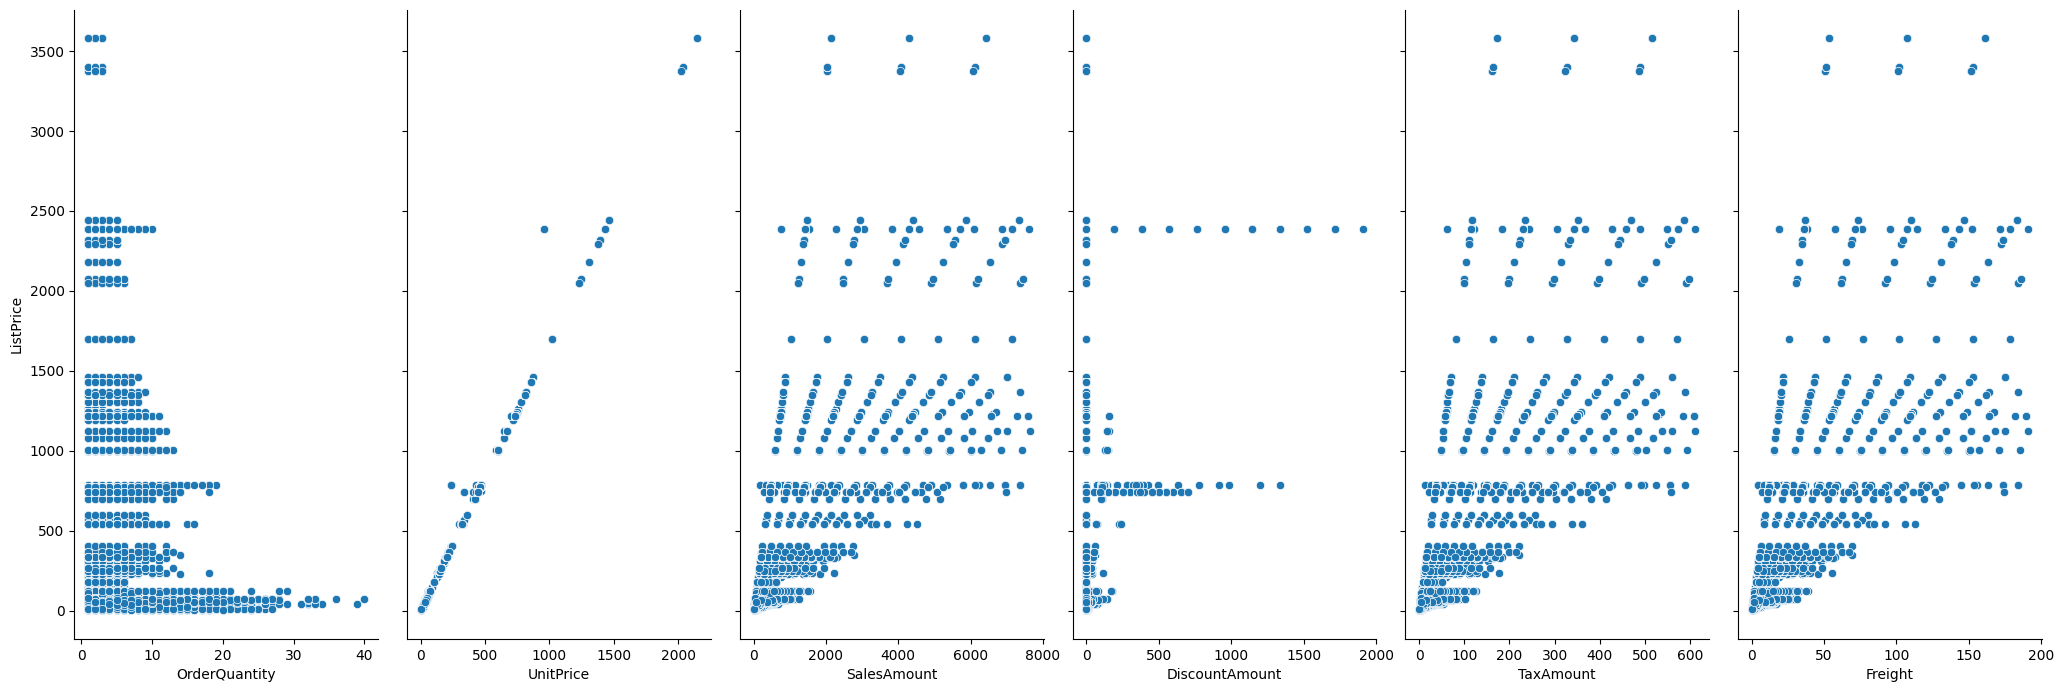

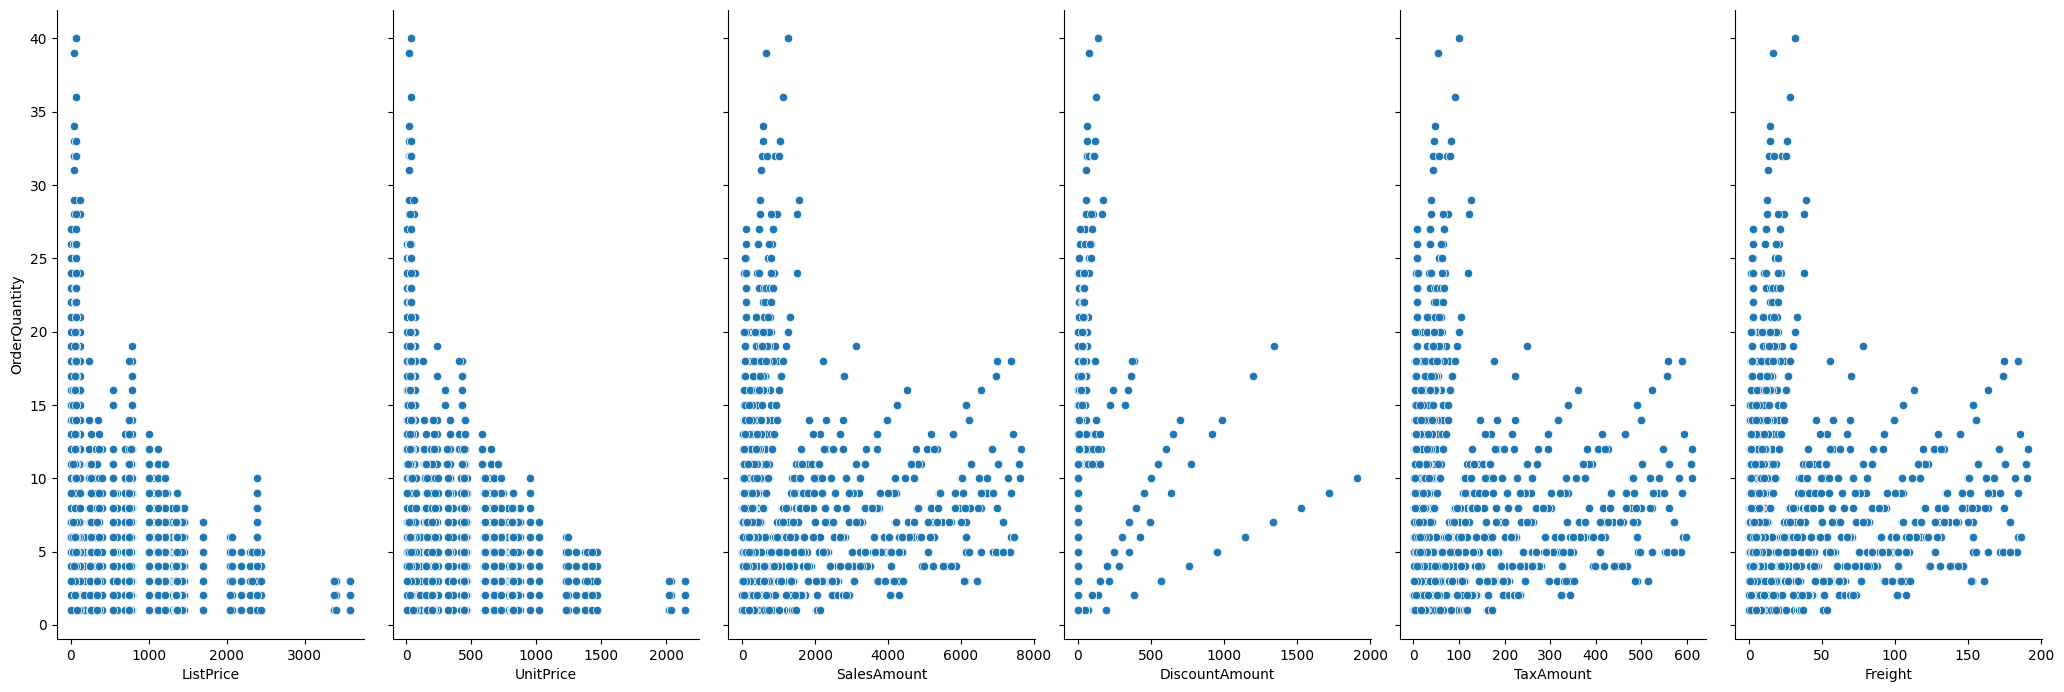

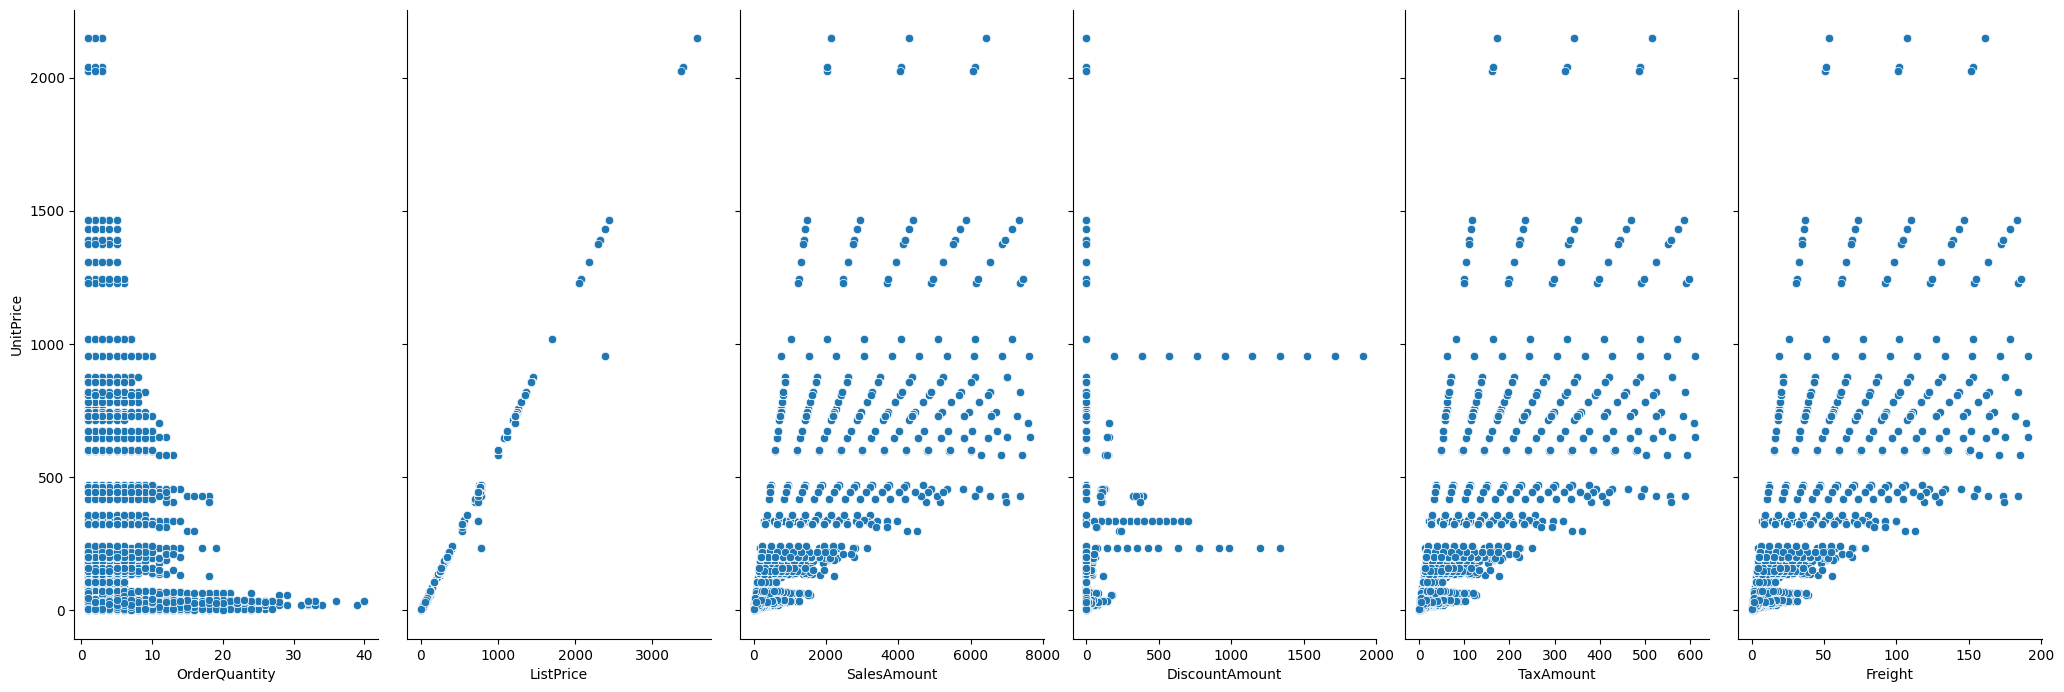

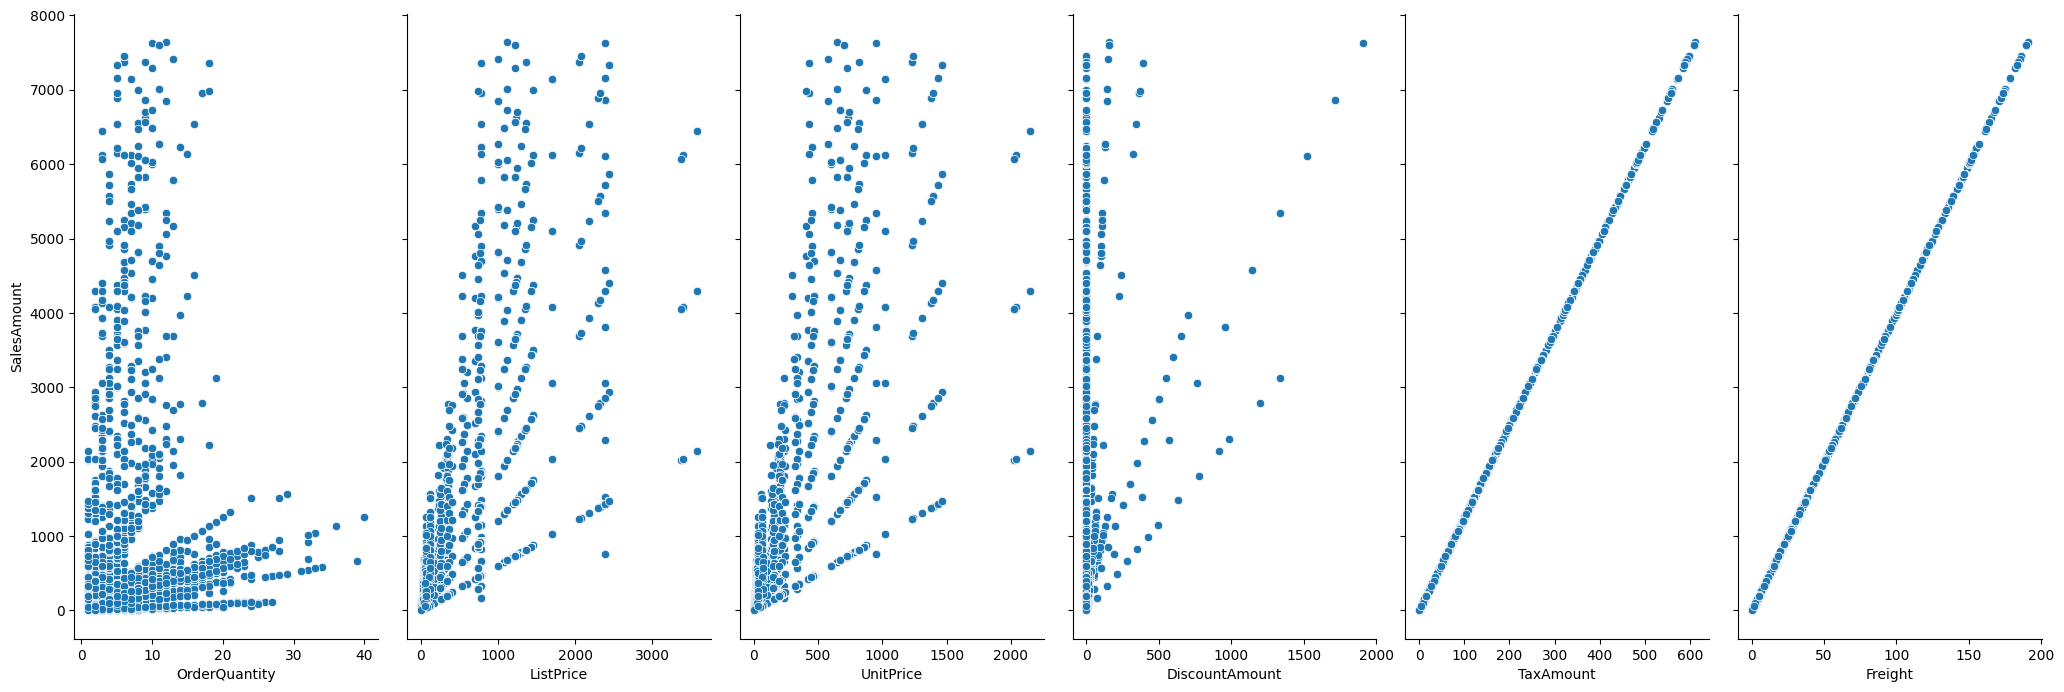

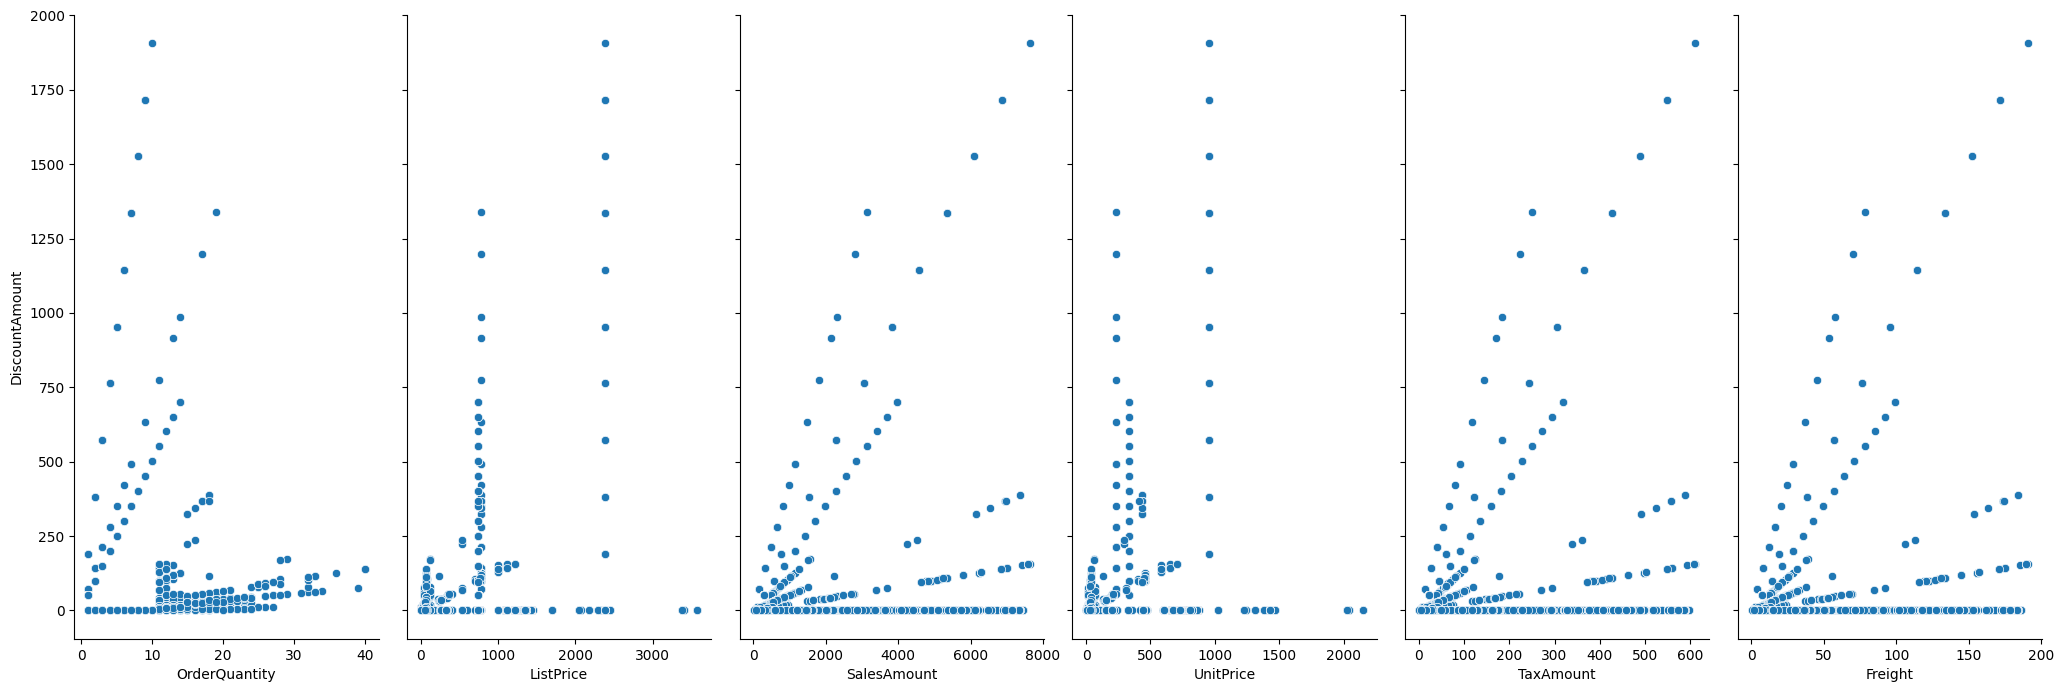

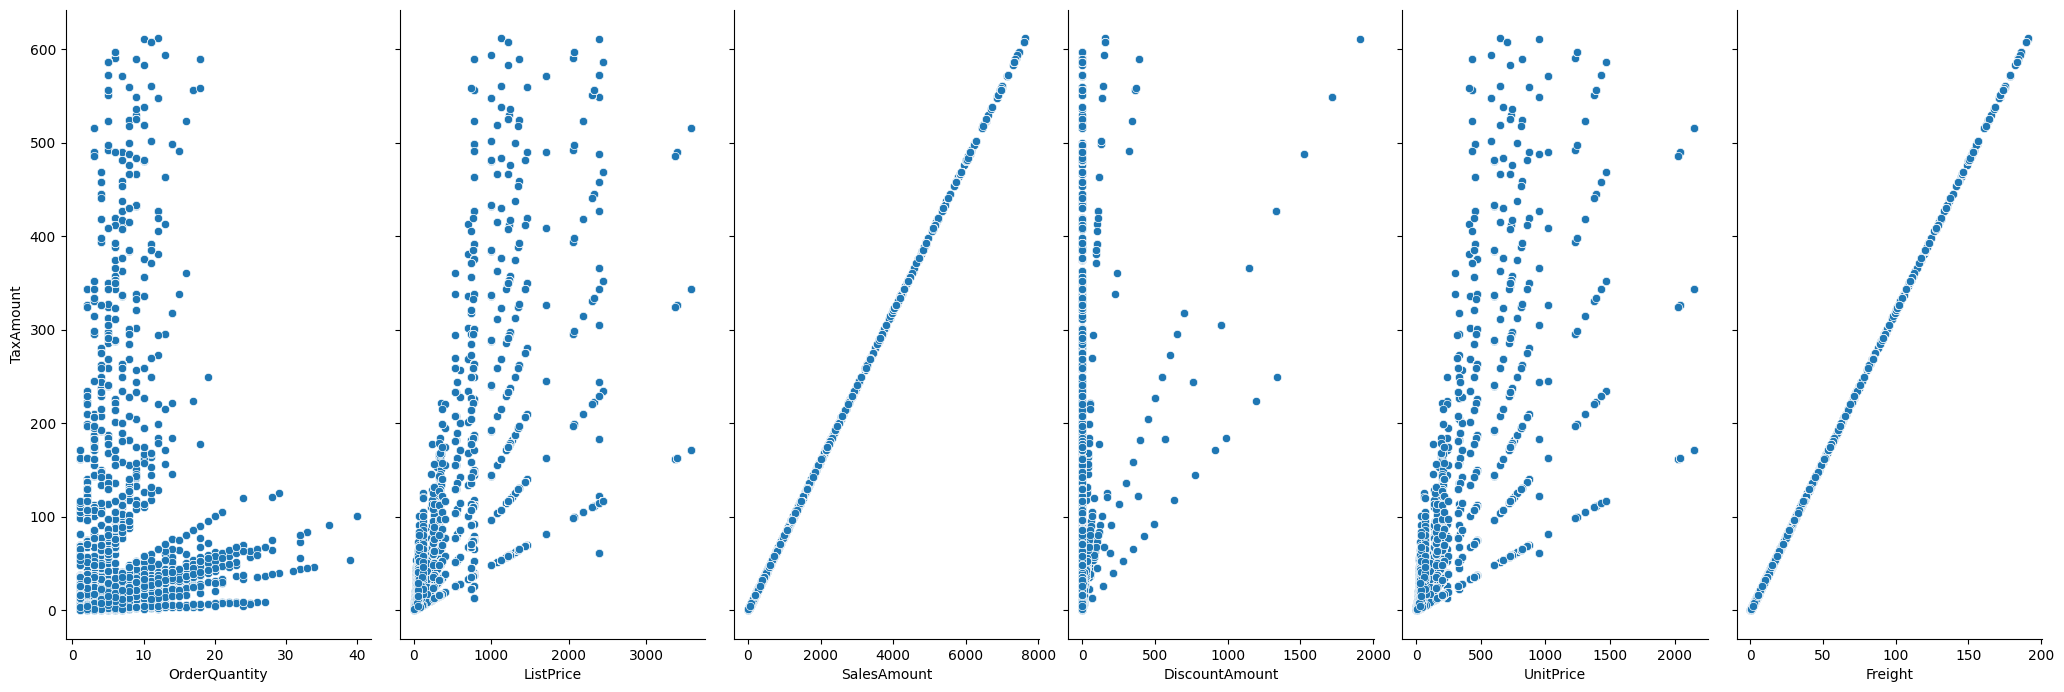

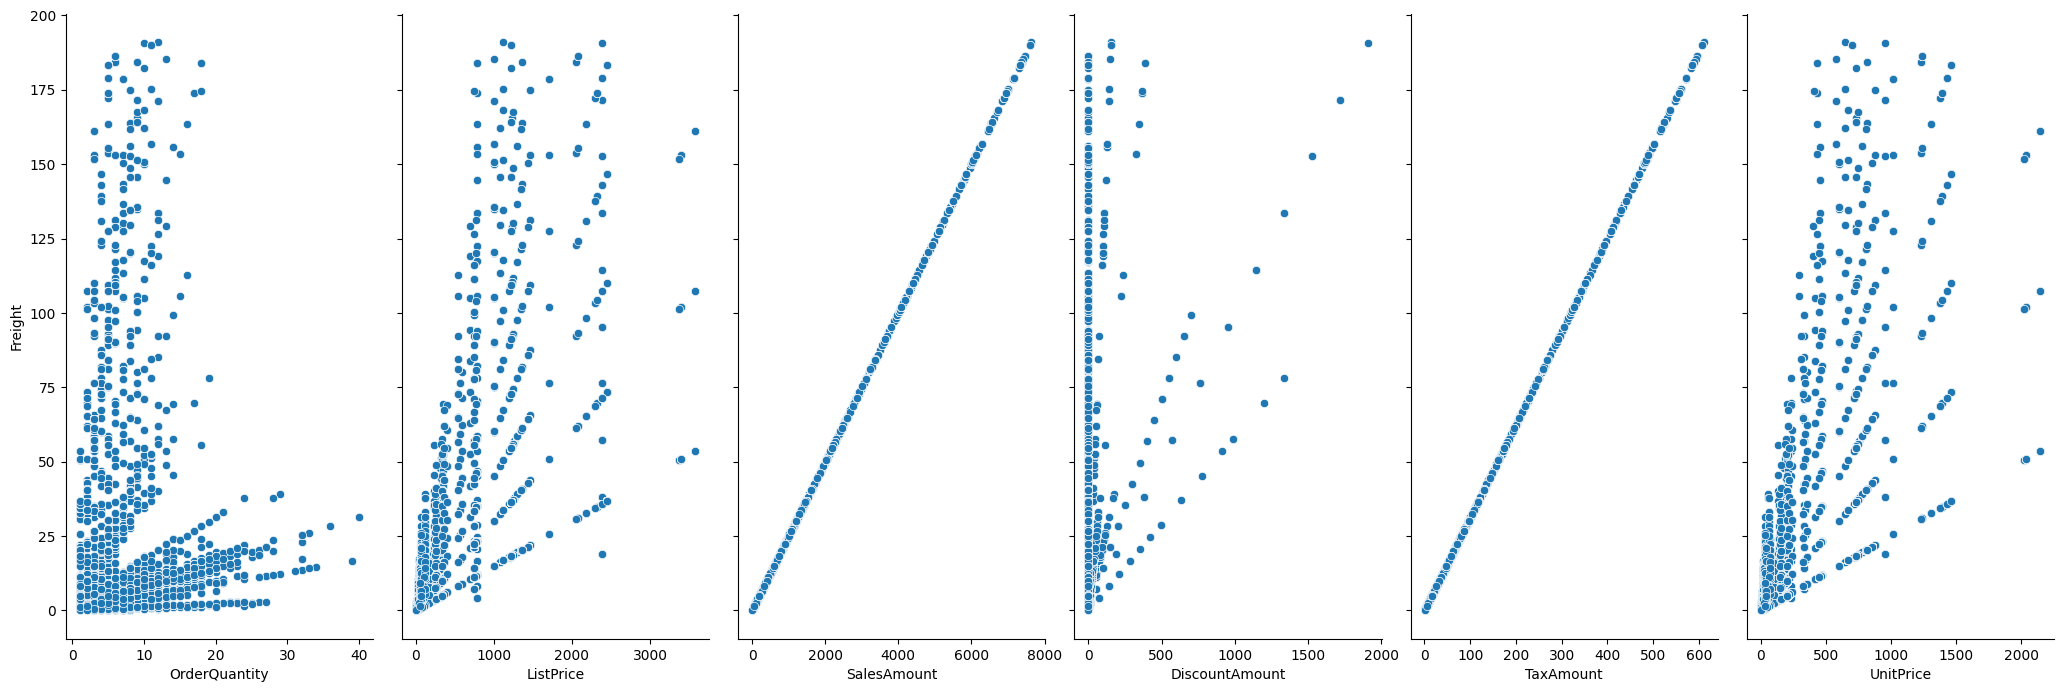

In [69]:
#Scatter plot
fig.set_size_inches(20,10)
sns.pairplot(data, x_vars=['OrderQuantity','UnitPrice', 'SalesAmount', 'DiscountAmount', 'TaxAmount', 'Freight'], y_vars='ListPrice', height=7, aspect=0.5)
sns.pairplot(data, x_vars=['ListPrice','UnitPrice', 'SalesAmount', 'DiscountAmount', 'TaxAmount', 'Freight'], y_vars='OrderQuantity', height=7, aspect=0.5)
sns.pairplot(data, x_vars=['OrderQuantity','ListPrice', 'SalesAmount', 'DiscountAmount', 'TaxAmount', 'Freight'], y_vars='UnitPrice', height=7, aspect=0.5)
sns.pairplot(data, x_vars=['OrderQuantity','ListPrice', 'UnitPrice', 'DiscountAmount', 'TaxAmount', 'Freight'], y_vars='SalesAmount', height=7, aspect=0.5)
sns.pairplot(data, x_vars=['OrderQuantity','ListPrice', 'SalesAmount', 'UnitPrice', 'TaxAmount', 'Freight'], y_vars='DiscountAmount', height=7, aspect=0.5)
sns.pairplot(data, x_vars=['OrderQuantity','ListPrice', 'SalesAmount', 'DiscountAmount', 'UnitPrice', 'Freight'], y_vars='TaxAmount', height=7, aspect=0.5)
sns.pairplot(data, x_vars=['OrderQuantity','ListPrice', 'SalesAmount', 'DiscountAmount', 'TaxAmount', 'UnitPrice'], y_vars='Freight', height=7, aspect=0.5)

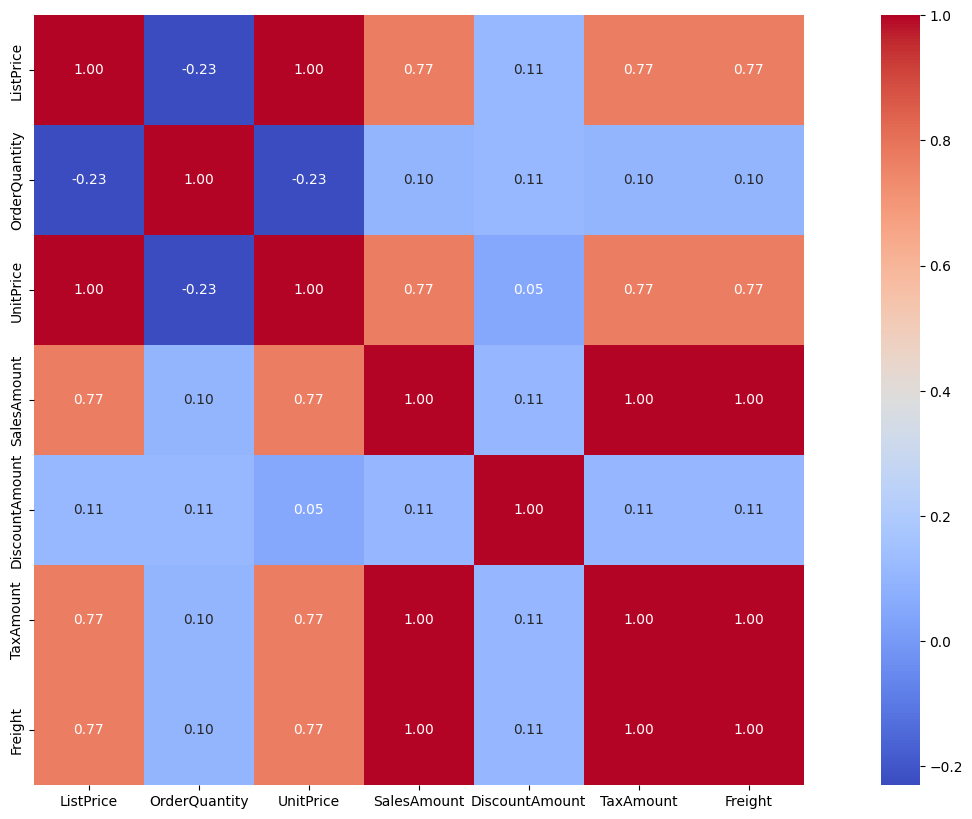

In [71]:
f = data.drop(columns=['ProcessingDays', 'NormalizedPrice'])

# Select only numeric columns
df_numeric = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corrmat = df_numeric.corr()

# Create a heatmap
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(corrmat, square=True, annot=True, fmt='.2f', cmap='coolwarm')

plt.show()

**Analysis**:
List Price and Unit Price are positively correlated. If we analyze our data, we can see that the unit price is always approximately 0.6x the List Price.
Sales amount, tax amount and freight charges are also positively correlated with one another. If we analyze our data, we can see that the tax amount is always 8% of the Sales amount and the freight is 2.5% of the Sales amount.

The sales amount also has a positive corelation with Unit Price and ListPrice as the higher the prices of individual products, the more the total sales amount

Unit Price and Order Quantity have a negative correlation although it is not very strong. The negative correlation would make sense as the higher the price, the lower the quantity of products you would buy.